<center>
<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/1/1d/Logo_T%C3%A9l%C3%A9com_SudParis.svg/1014px-Logo_T%C3%A9l%C3%A9com_SudParis.svg.png" width="30%"></img>
</center>

<center> <h2> NET 4103/7431 Complex Network </h2> </center>

<center> <h3> Rodrigo Canek (rodrigo.canek@telecom-sudparis.eu) </h3> </center>



In [ ]:
NOM = "Canek"
PRENOM = "Rodrigo"

---

<h2 align="center">Homework - Rodrigo Canek</h2> 



# Getting Started



In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [88]:
# Style pour le Notebook
from IPython.core.display import HTML

def css_styling():
    styles = open("/content/drive/My Drive/Colab Notebooks/NT/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [89]:
import networkx as nx
import matplotlib.pylab as plt

%matplotlib inline

# Question # 2

Caltech (with 762 nodes in the LCC), MIT(which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes inthe LCC).

In [90]:
import networkx as nx

GCaltech = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Caltech36.graphml")

GMIT = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/MIT8.graphml")

GJH = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Johns Hopkins55.graphml")


## A) Degree Distribution

In [91]:
import matplotlib.pyplot as plt
import numpy as np

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins='auto')
    plt.show()


def plot_degree_dist2(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
  hist, bin_edges = np.histogram(degree_sequence, density=True)
  plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
  plt.xlabel(r"$k$, degree ")
  plt.ylabel(r"PDF")
  plt.ylim(1e-3, 1)
  plt.title("Degree distribution")



### Caltech

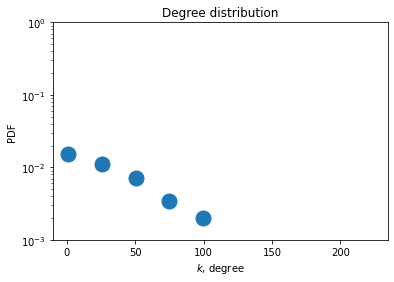

In [92]:
plot_degree_dist2(GCaltech)

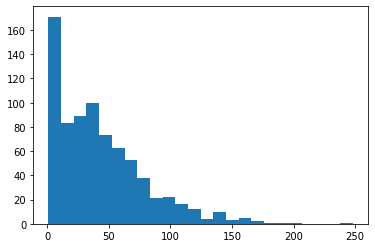

In [93]:
plot_degree_dist(GCaltech)

### MIT

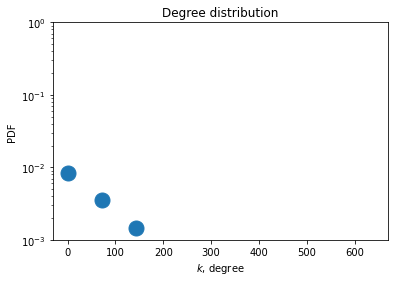

In [94]:
plot_degree_dist2(GMIT)

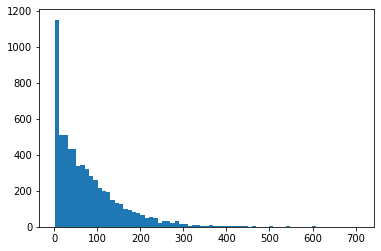

In [95]:
plot_degree_dist(GMIT)

### John Hopkins

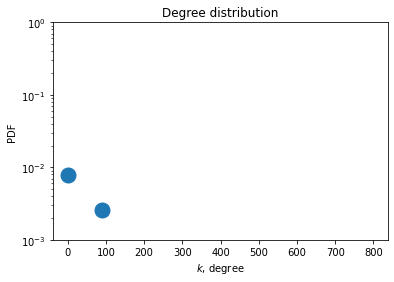

In [96]:
plot_degree_dist2(GJH)

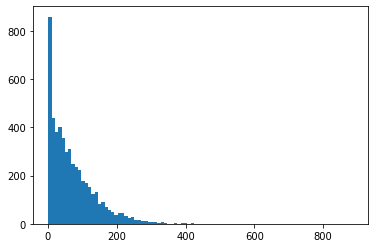

In [97]:
plot_degree_dist(GJH)

### Question

From all the networks, we can notice that all of them have highly connected nodes but in small amounts. But a big amount of data that have a low degree. Meaning that usually the people using facebook had few friends or connections, but there are some of them that had many connections with the people in the networks. In the case of Caltech, we can notice that the difference is not that big but in the other two, the difference between the amount of connections is considerable. 

## B) Clustering

In [98]:
glCal = nx.transitivity(GCaltech)
glMIT = nx.transitivity(GMIT)
glJH = nx.transitivity(GJH)

print('Global clustering of Caltech: ', glCal)
print('Global clustering of MIT: ', glMIT)
print('Global clustering of John Hopkins: ', glJH)

Global clustering of Caltech:  0.2912826901150874
Global clustering of MIT:  0.18028845093502427
Global clustering of John Hopkins:  0.19316123901594015


In [99]:
clCal = nx.average_clustering(GCaltech)
clMIT = nx.average_clustering(GMIT)
clJH = nx.average_clustering(GJH)

print('Mean local clustering of Caltech: ', clCal)
print('Mean local clustering of MIT: ', clMIT)
print('Mean local clustering of John Hopkins: ', clJH)

Mean local clustering of Caltech:  0.40929439048517247
Mean local clustering of MIT:  0.2712187419501315
Mean local clustering of John Hopkins:  0.26839307371293525


In [100]:
denCal = nx.density(GCaltech)
denMIT = nx.density(GMIT)
denJH = nx.density(GJH)

print('Edge Density of Caltech: ', denCal)
print('Edge Density of MIT: ', denMIT)
print('Edge Density of John Hopkins: ', denJH)

Edge Density of Caltech:  0.05640442132639792
Edge Density of MIT:  0.012118119495041378
Edge Density of John Hopkins:  0.013910200162372396


For what we can notice, the networks are closer to be sparse than dense. Most of them have a low values in the different coefficients. The Caltech one is the one that shows that more people knew each other but does not mean that all of them knew each other. Justa that there are more triplets than in the other networks.
The next one in the mean local is the MIT and the last one is John Hopkins.  

## C) Scatter plot

In [101]:
def get_deg(list):
  may = 0
  for x in list:
    if x[1] > may:
      may = x[1]
  return may

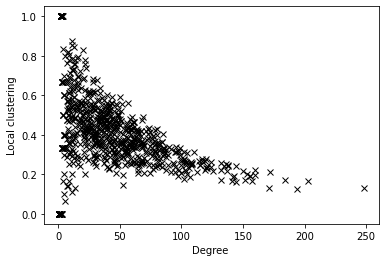

In [102]:
x = [get_deg(GCaltech.degree), get_deg(GMIT.degree), get_deg(GJH.degree)]
y = [clCal, clMIT, clJH]


degree_GCaltech = [val for (node, val) in GCaltech.degree]
degree_GMIT = [val for (node, val) in GMIT.degree]
degree_GJH = [val for (node, val) in GJH.degree]
clus_GCaltech = nx.clustering(GCaltech)
clus_GMIT = nx.clustering(GMIT)
clus_GJH = nx.clustering(GJH)



plt.xlabel(r"Degree ")
plt.ylabel(r"Local clustering")

plt.plot(degree_GCaltech, list(clus_GCaltech.values()),'x', color='black');

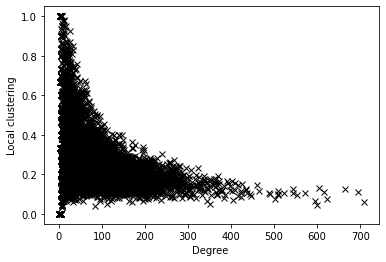

In [103]:
plt.xlabel(r"Degree ")
plt.ylabel(r"Local clustering")

plt.plot(degree_GMIT,list(clus_GMIT.values()), 'x', color='black');

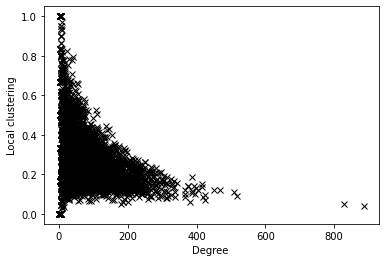

In [104]:
plt.xlabel(r"Degree ")
plt.ylabel(r"Local clustering")

plt.plot(degree_GJH, list(clus_GJH.values()), 'x', color='black');

### Conclusions



*   The first conclusion that we can see is that the people with lower degree are the ones that have more clustering. Meaning that they might have in the social network more clustering because they had only their friends or people that they knew.  
*   While, the people that had more connections and have a high degree are the ones that may know more people in the network but not all the people they know, are connected to each other. They might be from different faculties, years, etc.
* The degree distributions of the three Universities have heavy tails and they also show a that the degree distributions seams to be approximately exponential
* In the caltech one, as we have already mention in the previous one, they have more concentration in the middle and are the ones that might be more connected. This can be related as well to the size of the network, that they were not that much people
* In MIT and John Hopkins we see a really similar behavior, where they are concentrated in the lower degrees and as they have more and more degree they decrease in the clustering, and they have very few nodes with a high degree. 



# Question # 3

Using the FB100 networks, investigate the assortativity patterns for three vertex attributes: (i) student/faculty status, (ii) major, (iii) vertex degree, and (iiii)dorm. Treat these networks as simple graphs in your analysis. For each vertex attribute, make a scatter plot showing the assortativity versus network size n, on log-linear axes, for all 100 networks, and a histogram or density plot showing the distribution of assortativity values. In both figures, include aline indicating no assortativity. 

* Note: I decided to use the following three attributes of (i) student/faculty status, (ii) major, and (iii)dorm

In [105]:
G1 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Johns Hopkins55.graphml")
G2 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/William77.graphml")
G3 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/MIT8.graphml")
G4 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Williams40.graphml")
G5 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Yale4.graphml")
G6 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Duke14.graphml")
G7 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Cal65.graphml")
G8 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/American75.graphml")
G9 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Colgate88.graphml")
G10 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Carnegie49.graphml")
G11 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Princeton12.graphml")
G12 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Penn94.graphml")
G13 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Wisconsin87.graphml")
G14 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Berkeley13.graphml")
G15 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Harvard1.graphml")
G16 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Indiana69.graphml")
G17 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Maine59.graphml")
G18 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Notre Dame57.graphml")
G19 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Syracuse56.graphml")
G20 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Texas80.graphml")

In [106]:
print(nx.attribute_assortativity_coefficient(G1, "dorm"))
print(nx.attribute_assortativity_coefficient(G1, "student_fac"))
print(nx.attribute_assortativity_coefficient(G1, "major_index"))
print(nx.degree_assortativity_coefficient(G1))
print(G1.size())

0.1094139656825041
0.32521116673118183
0.06353066589182865
0.07980496716493633
186586


## Dorms

Network Size vs Assortativity

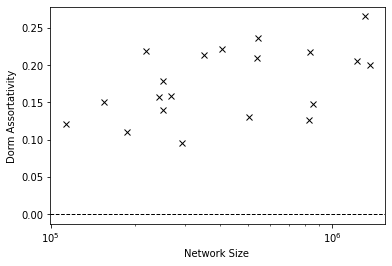

In [107]:
x = 0
Gs = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, G11, G12, G13, G14, G15, G16, G17, G18, G19, G20]
net_size = []
dorm_att = []
x=1
for x in range(0, 20):
  dorm_att.append(nx.attribute_assortativity_coefficient(Gs[x], "dorm"))
  net_size.append(Gs[x].size())

plt.xlabel(r"Network Size ")
plt.ylabel(r"Dorm Assortativity")
plt.xscale('log')
plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
#plt.ylim(bottom=-0.01)
plt.plot(net_size, dorm_att, 'x', color='black');

Distribution of assortativity values

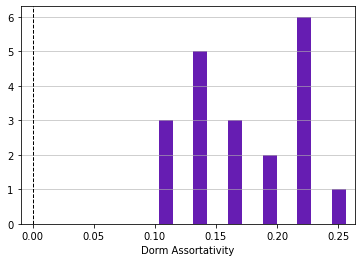

In [108]:
import matplotlib.pyplot as plt
#dorm_att2 = sorted(dorm_att, reverse=True)
#print(dorm_att)
plt.hist(dorm_att, bins='auto', color='#5504aa',alpha=0.9, rwidth=0.4)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dorm Assortativity')
plt.xlim(left=-0.01)
plt.axvline(0, color='k', linestyle='dashed', linewidth=1)

## Student Faculty

Network Size vs Assortativity

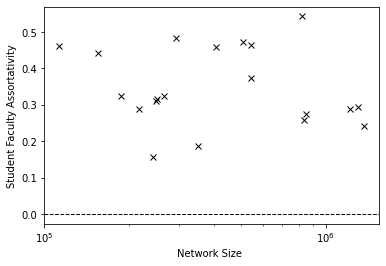

In [109]:
x = 0
net_size = []
stud_att = []
x=1
for x in range(0, 20):
  stud_att.append(nx.attribute_assortativity_coefficient(Gs[x], "student_fac"))
  net_size.append(Gs[x].size())


plt.xlabel(r"Network Size ")
plt.ylabel(r"Student Faculty Assortativity")
plt.xscale('log')
plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
#plt.ylim(bottom=-0.01)
plt.plot(net_size, stud_att, 'x', color='black');

Distribution of assortativity values

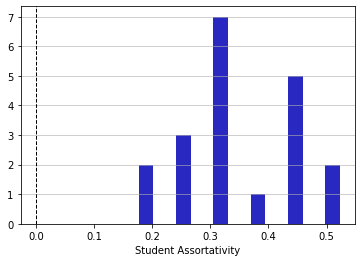

In [110]:
plt.hist(stud_att, bins='auto', color='#1111bb',alpha=0.9, rwidth=0.4)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Student Assortativity')
#plt.xlim(left=-0.01)
plt.axvline(0, color='k', linestyle='dashed', linewidth=1)

## Major Index

Network Size vs Assortativity

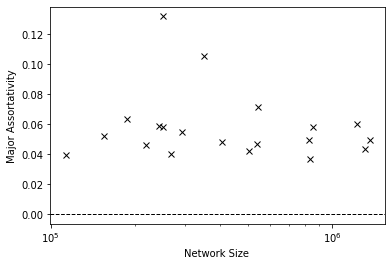

In [111]:
x = 0
net_size = []
major_att = []
x=1
for x in range(0, 20):
  major_att.append(nx.attribute_assortativity_coefficient(Gs[x], "major_index"))
  net_size.append(Gs[x].size())


plt.xlabel(r"Network Size ")
plt.ylabel(r"Major Assortativity")
plt.xscale('log')
plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
#plt.ylim(bottom=-0.00001)
plt.plot(net_size, major_att, 'x', color='black');

Distribution of assortativity values

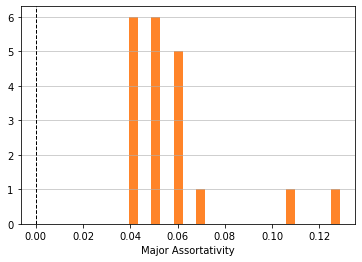

In [112]:
plt.hist(major_att, bins='auto', color='#ff7711',alpha=0.9, rwidth=0.4)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Major Assortativity')
#plt.xlim(left=-0.01)
plt.axvline(0, color='k', linestyle='dashed', linewidth=1)

## Degree

Degree vs Assortativity

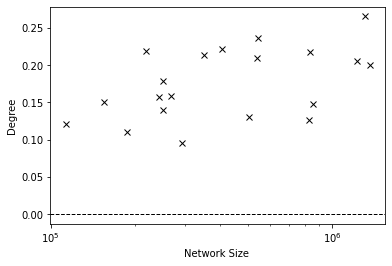

In [113]:

Gs = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, G11, G12, G13, G14, G15, G16, G17, G18, G19, G20]
net_size = []
deg_att = []
for x in range(0, 20):
  deg_att.append(nx.degree_assortativity_coefficient(Gs[x]))
  net_size.append(Gs[x].size())

plt.xlabel(r"Network Size ")
plt.ylabel(r"Degree")
plt.xscale('log')
plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
#plt.ylim(bottom=-0.01)
plt.plot(net_size, dorm_att, 'x', color='black');

Distribution of assortativity values

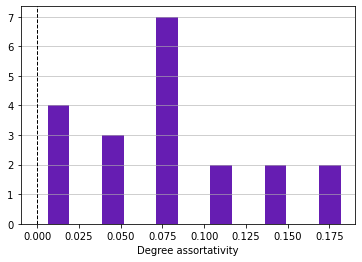

In [114]:
import matplotlib.pyplot as plt
plt.hist(deg_att, bins='auto', color='#5504aa',alpha=0.9, rwidth=0.4)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Degree assortativity')
plt.xlim(left=-0.01)
plt.axvline(0, color='k', linestyle='dashed', linewidth=1)

## Discussion

Briefly discuss the degree to which vertices do or
do not exhibit assortative mixing on each attribute, and speculate about what
kind of processes or tendencies in the formation of Facebook friendships might
produce this kind of pattern.

* In my case, dorms show a high assortativity. In this case, it is kind of logic that people that live in the same building, or that were roomates during college, have friends from the same dorm and share their friends. 

* The attribute that I found that might have the higher assortativity is the faculty, meaning that the people that study the same or similar careers might be friends in the network. And the one with the lower assortativity is the major index. Meaning that the majors are not involved in making friends.

* In general, this four characteristics, shown that they might have a small relevance to create the friendship with other people. Of course that some of the attributes have more relevance than others becuase when you create a new relationship you create a relationship with the people who lives closer to you, people that you see in a daily basis, people that study the same or similar to you. And some attributes, that have low assortativity show that they are not that relevant to create a friendship, like the titles you have or the majors. 


# Question # 4

- Read the document 
- Implement in python the label propagation algorithm, please consider pytorch and networkx for the development of your algorithm.
- Choose a network from The Facebook100 dataset and randomly select 10%,20% and 30% of of the node attributes of the network to be remove. Use the label propagation algorithm you implemented to recover the missing attributes. Perform this operation for each of the following attributes : the ”dorm”, ”major”,”gender”.
- For each cases of the following percentage of missing attributes: 10%, 20% and30% and for each of the following attributes: the ”dorm”, ”major”, ”gender”show the mean absolute error and accuracy of the label propagation algorithmas in the example provided in Table1 for the Duke university Facebook network.
- Conclude on the accuracy of the label propagation algorithm for the different labels, could you explain why there is such difference in accuracy between each labels ?

In [115]:
import networkx as nx
import numpy as np
import math
from random import seed
from random import random

In [116]:
G6 = nx.read_graphml("/content/drive/My Drive/Colab Notebooks/NT/Homework/Data/Duke14.graphml")

In [117]:
def normalize(G):
    A = nx.to_numpy_array(G)
    D = np.sum(A, axis=1)
    Dinv = np.diag(1./D)
    return Dinv @ A

def label_propagation(G, Ylabel, idLabels, tol=1e-3, max_iter=1000):
    Yfixed = Ylabel.copy()
    N = len(G)
    P = normalize(G)
    Yprev = np.zeros(Ylabel.shape)
    for _ in range(max_iter):
        var = np.abs(np.sum(Yprev - Ylabel))
        if var < tol:
            break
        Yprev = Ylabel.copy()
        Ylabel = np.dot(P, Yprev)
        Ylabel[idLabels] = Yfixed[idLabels]
    return Ylabel

def label_propagation_complete(G, label, tol, percentage):
  g_values = nx.get_node_attributes(G,label)
  unique_values = set( val for dic in g_values for val in g_values.values())
  list_unique_values = list(unique_values)
  
  #values for the creation of the arrays
  N2 = len(list(list_unique_values))
  N = len(G)
  
  #labels
  Ylabel = np.zeros((N, N2))
  Ylabel_copy = np.zeros((N, N2))
  percent = math.ceil(N*percentage)
  
  initial = percent * math.floor(random() * 1/percentage)
  initial_or = initial
  total_value = initial + percent
  values_to_aprox = []
  aux_sum = 0
  for value in g_values:
    for value2 in range(N2):
      if g_values[value] == list_unique_values[value2] and g_values[value] != 0 and initial < total_value and initial <= aux_sum:
        Ylabel[int(value), value2] = 0
        Ylabel_copy[int(value), value2] = 1
        initial = initial + 1
        values_to_aprox.append(aux_sum)
      elif g_values[value] == list_unique_values[value2] and g_values[value] != 0 :
        Ylabel[int(value), value2] = 1
        Ylabel_copy[int(value), value2] = 1
    aux_sum = aux_sum + 1

  idLabels = (Ylabel.sum(axis=1) == 1)
  Ylabels = label_propagation(G, Ylabel, idLabels, tol, max_iter=1000)

  #print(initial)
  #print(idLabels)
  #print(Ylabels)
  return Ylabels, Ylabel_copy, values_to_aprox, initial_or, percent


In [118]:
Ylabels_gender, Ylabel_copy, values_to_aprox, initial, percent = label_propagation_complete(G6, 'gender', 1e-3, 0.1)

In [119]:
def accuracy(Predicted, Ylabel_copy, initial, percentage):
  aver = 0
  idLabels = (Ylabel_copy.sum(axis=1) == 1)
  i = initial
  total = 0
  while (i < (percentage + initial)):
    #print(idLabels[i])
    
    if (idLabels[i]):
      #print(Ylabel_copy[i])
      total = total + 1
      aux1 = 0
      greater_val = 0
      for value in Ylabel_copy[i]:
        if value != 0:
          #print(aux1, value)
          break;
        aux1 = aux1 + 1
      
      for value in Predicted[i]:
        if value > greater_val:
          greater_val = value
      #per = 
      if (Predicted[i][aux1] >= (1 /(len(Predicted[i]) -1)) and Predicted[i][aux1] >= greater_val):
        aver = aver + 1
    i = i + 1

  return aver/total

In [120]:
average10 = accuracy(Ylabels_gender, Ylabel_copy, initial, percent)
print(average10)

0.6756756756756757


In [121]:
from sklearn.metrics import mean_absolute_error
idLabels = (Ylabel_copy.sum(axis=1) == 1)
mean_absolute_error(Ylabel_copy[idLabels], Ylabels_gender[idLabels])

0.032111022334947364

In [122]:
Ylabels_gender2, Ylabel_copy2, values_to_aprox2, initial2, percent2 = label_propagation_complete(G6, 'gender', 1e-3, 0.2)

In [123]:
average20 = accuracy(Ylabels_gender2, Ylabel_copy2, initial2, percent2)
print(average20)

0.676341730558598


In [124]:
idLabels = (Ylabel_copy2.sum(axis=1) == 1)
mean_absolute_error(Ylabel_copy2[idLabels], Ylabels_gender2[idLabels])

0.06582704131466205

In [125]:
Ylabels_gender3, Ylabel_copy3, values_to_aprox3, initial3, percent3 = label_propagation_complete(G6, 'gender', 1e-3, 0.3)

In [126]:
average30 = accuracy(Ylabels_gender3, Ylabel_copy3, initial3, percent3)
print(average30)

0.6747341400806748


In [127]:
idLabels = (Ylabel_copy3.sum(axis=1) == 1)
mean_absolute_error(Ylabel_copy3[idLabels], Ylabels_gender3[idLabels])

0.09990151249014423

In [128]:
Ylabels_dorm1, Ylabel_copy_dorm1, values_to_aprox_dorm1, initial_dorm1, percent_dorm1 = label_propagation_complete(G6, 'dorm', 1e-3, 0.1)

In [129]:
average_dorm10 = accuracy(Ylabels_dorm1, Ylabel_copy_dorm1, initial_dorm1, percent_dorm1)
print(average_dorm10)


0.49927431059506533


In [130]:
idLabels = (Ylabel_copy_dorm1.sum(axis=1) == 1)
mean_absolute_error(Ylabel_copy_dorm1[idLabels], Ylabels_dorm1[idLabels])

0.0016966319542925717

In [131]:
Ylabels_dorm2, Ylabel_copy_dorm2, values_to_aprox_dorm2, initial_dorm2, percent_dorm2 = label_propagation_complete(G6, 'dorm', 1e-3, 0.2)

In [132]:
average_dorm20 = accuracy(Ylabels_dorm2, Ylabel_copy_dorm2, initial_dorm2, percent_dorm2)
print(average_dorm20)




0.5485714285714286


In [133]:
idLabels = (Ylabel_copy_dorm2.sum(axis=1) == 1)
mean_absolute_error(Ylabel_copy_dorm2[idLabels], Ylabels_dorm2[idLabels])

0.002379294424239512

In [134]:
Ylabels_dorm3, Ylabel_copy_dorm3, values_to_aprox_dorm3, initial_dorm3, percent_dorm3 = label_propagation_complete(G6, 'dorm', 1e-3, 0.3)

In [135]:
average_dorm30 = accuracy(Ylabels_dorm3, Ylabel_copy_dorm3, initial_dorm3, percent_dorm3)
print(average_dorm30)




0.4995183044315992


In [136]:
idLabels = (Ylabel_copy_dorm3.sum(axis=1) == 1)
mean_absolute_error(Ylabel_copy_dorm3[idLabels], Ylabels_dorm3[idLabels])

0.005256702829892758

In [137]:
Ylabels_major1, Ylabel_copy_major1, values_to_aprox_major1, initial_major1, percent_major1 = label_propagation_complete(G6, 'major_index', 1e-3, 0.1)


In [138]:
average_maj10 = accuracy(Ylabels_major1, Ylabel_copy_major1, initial_major1, percent_major1)
print(average_maj10)

0.26125


In [139]:
idLabels = (Ylabel_copy_major1.sum(axis=1) == 1)
mean_absolute_error(Ylabel_copy_major1[idLabels], Ylabels_major1[idLabels])

0.003304288698254832

In [140]:
Ylabels_major2, Ylabel_copy_major2, values_to_aprox_major2, initial_major2, percent_major2 = label_propagation_complete(G6, 'major_index', 1e-3, 0.2)

In [141]:
Ylabels_major3, Ylabel_copy_major3, values_to_aprox_major3, initial_major3, percent_major3 = label_propagation_complete(G6, 'major_index', 1e-3, 0.3)

In [142]:
average_maj20 = accuracy(Ylabels_major2, Ylabel_copy_major2, initial_major2, percent_major2)
average_maj30 = accuracy(Ylabels_major3, Ylabel_copy_major3, initial_major3, percent_major3)
print(average_maj20)
print(average_maj30)

0.2715273412947832
0.24895920066611157


In [143]:
idLabels = (Ylabel_copy_major2.sum(axis=1) == 1)
mean_absolute_error(Ylabel_copy_major2[idLabels], Ylabels_major2[idLabels])


0.006592115289288846

In [144]:
idLabels = (Ylabel_copy_major3.sum(axis=1) == 1)
mean_absolute_error(Ylabel_copy_major3[idLabels], Ylabels_major3[idLabels])

0.009959803998076869

In [145]:
matrix = [['Attribute', '0.1', '0.2', '0.3'], ['Gender', average10, average20, average30], ['Dorm', average_dorm10, average_dorm20, average_dorm30], ['Major', average_maj10, average_maj20, average_maj30]]
matrix

[['Attribute', '0.1', '0.2', '0.3'],
 ['Gender', 0.6756756756756757, 0.676341730558598, 0.6747341400806748],
 ['Dorm', 0.49927431059506533, 0.5485714285714286, 0.4995183044315992],
 ['Major', 0.26125, 0.2715273412947832, 0.24895920066611157]]

## Conclusions

* Replicating the results shown in the table, we can notice that the algorithm depends on the data. How many data we have, how many labels, and how many labels with data we have. 
* The difference that we can notice while working with the data is that it depends on how many labels the algorithm has to be able to predict. In this case, when it had to predict the labels of the gender, it was really efficient since it was able to predict only two labels, either male or female. While in the others, the algorithm had to predict in way to much more labels.
* We can notice as well, that usually with more data is more accurate, and this makes sense. Because the idea behind the algorithm is to predict according to your connections and "friends" in this case. So, by having more data about your friends and the relationship, its possible to make better preditions.
* The mean absolute error and the accuracy both of them decreases while increasing the percentage of values missing, giving evidence of the previous statement.  

# This are all the attemps to get a funtional label propagation algorithm


In [ ]:
acc = {}
for value in range(math.ceil(N*0.1)):
  acc[value] = dorm[str(value)] - dictio[value]

acc

In [ ]:
dorm=nx.get_node_attributes(G6,'gender')
#print(dorm)
dorm2 = set( val for dic in dorm for val in dorm.values())
listdorm2 = list(dorm2) 
N2 = len(list(dorm2))

In [ ]:
print(dorm)
print(listdorm2)

{'0': 0, '1': 2, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 2, '8': 1, '9': 2, '10': 2, '11': 1, '12': 2, '13': 1, '14': 2, '15': 1, '16': 2, '17': 1, '18': 1, '19': 2, '20': 2, '21': 2, '22': 1, '23': 1, '24': 2, '25': 2, '26': 0, '27': 1, '28': 1, '29': 1, '30': 1, '31': 1, '32': 2, '33': 1, '34': 1, '35': 2, '36': 2, '37': 2, '38': 2, '39': 2, '40': 2, '41': 1, '42': 1, '43': 2, '44': 2, '45': 2, '46': 1, '47': 2, '48': 1, '49': 1, '50': 2, '51': 1, '52': 1, '53': 2, '54': 2, '55': 1, '56': 2, '57': 1, '58': 1, '59': 1, '60': 0, '61': 1, '62': 2, '63': 1, '64': 2, '65': 2, '66': 1, '67': 2, '68': 2, '69': 1, '70': 2, '71': 1, '72': 2, '73': 1, '74': 1, '75': 2, '76': 1, '77': 2, '78': 2, '79': 1, '80': 1, '81': 1, '82': 2, '83': 1, '84': 2, '85': 2, '86': 1, '87': 2, '88': 2, '89': 2, '90': 1, '91': 2, '92': 2, '93': 1, '94': 2, '95': 0, '96': 1, '97': 2, '98': 2, '99': 1, '100': 1, '101': 2, '102': 2, '103': 2, '104': 0, '105': 1, '106': 1, '107': 1, '108': 2, '109': 1, '110': 1,

In [ ]:
N = len(G6)
Ylabel = np.zeros((N, N2))
percent = math.ceil(N*0.1)
initial = 0
#save the initial matrix

for value in dorm:
  for value2 in range(N2):
    if dorm[value] == listdorm2[value2] and dorm[value] != 0 and initial != percent:
      Ylabel[int(value), value2] = 0
      initial = initial + 1
    elif dorm[value] == listdorm2[value2] and dorm[value] != 0 :
      Ylabel[int(value), value2] = 1
      


print(N)
print(Ylabel)
#
#Ypredicted = label_propagation(G, Ylabel, idLabels)
#print(Ypredicted)

9895
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
array_try = []

for value in dorm:
  if (int(value) > N*0.1):
    array_try.append((int(value), dorm[value]))  

idLabels = (Ylabel.sum(axis=1) == 1)
Ylabel[idLabels]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
count = 0
for value in dorm:
  for value2 in range(N2):
    if dorm[value] == listdorm2[value2]:
      count = count + 1
print(count)

9895


In [ ]:
def normalize(G):
    A = nx.to_numpy_array(G)
    D = np.sum(A, axis=1)
    Dinv = np.diag(1./D)
    return Dinv @ A
    
def label_propagation(G, Ylabel, idLabels, tol=1e-3, max_iter=1000):
    Yfixed = Ylabel.copy()
    N = len(G)
    P = normalize(G)
    Yprev = np.zeros(Ylabel.shape)
    for _ in range(max_iter):
        var = np.abs(np.sum(Yprev - Ylabel))
        if var < tol:
            break
        Yprev = Ylabel.copy()
        Ylabel = np.dot(P, Yprev)
        Ylabel[idLabels] = Yfixed[idLabels]
    return Ylabel


In [ ]:
Ypredicted = label_propagation(G6, Ylabel, idLabels)
print(Ypredicted)

[[0.         0.28571429 0.71428571]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 ...
 [0.         0.70261046 0.29738954]
 [0.         0.         1.        ]
 [0.         1.         0.        ]]


In [ ]:
aux1 = 0
dictio = {}
for row in Ypredicted:
  great = 0
  for col in row:
    if (great < col):
      great = col

  dictio[aux1] = great
  aux1 = aux1 + 1
  if aux1 == math.ceil(N*0.1):
    break  
print(dictio)

{0: 0.7142857142857143, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 0.5652173913043477, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0, 57: 1.0, 58: 1.0, 59: 1.0, 60: 0.79501535804071, 61: 1.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 1.0, 69: 1.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 1.0, 74: 1.0, 75: 1.0, 76: 1.0, 77: 1.0, 78: 1.0, 79: 1.0, 80: 1.0, 81: 1.0, 82: 1.0, 83: 1.0, 84: 1.0, 85: 1.0, 86: 1.0, 87: 1.0, 88: 1.0, 89: 1.0, 90: 1.0, 91: 1.0, 92: 1.0, 93: 1.0, 94: 1.0, 95: 1.0, 96: 1.0, 97: 1.0, 98: 1.0, 99: 1.0, 100: 1.0, 101: 1.0, 102: 1.0, 103: 1.0, 104: 0.75, 105: 1.0, 106: 

In [ ]:
acc = {}
for value in range(math.ceil(N*0.1)):
  acc[value] = dorm[str(value)] - dictio[value]

acc

{0: -0.7142857142857143,
 1: 1.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 1.0,
 8: 0.0,
 9: 1.0,
 10: 1.0,
 11: 0.0,
 12: 1.0,
 13: 0.0,
 14: 1.0,
 15: 0.0,
 16: 1.0,
 17: 0.0,
 18: 0.0,
 19: 1.0,
 20: 1.0,
 21: 1.0,
 22: 0.0,
 23: 0.0,
 24: 1.0,
 25: 1.0,
 26: -0.5652173913043477,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 1.0,
 33: 0.0,
 34: 0.0,
 35: 1.0,
 36: 1.0,
 37: 1.0,
 38: 1.0,
 39: 1.0,
 40: 1.0,
 41: 0.0,
 42: 0.0,
 43: 1.0,
 44: 1.0,
 45: 1.0,
 46: 0.0,
 47: 1.0,
 48: 0.0,
 49: 0.0,
 50: 1.0,
 51: 0.0,
 52: 0.0,
 53: 1.0,
 54: 1.0,
 55: 0.0,
 56: 1.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: -0.79501535804071,
 61: 0.0,
 62: 1.0,
 63: 0.0,
 64: 1.0,
 65: 1.0,
 66: 0.0,
 67: 1.0,
 68: 1.0,
 69: 0.0,
 70: 1.0,
 71: 0.0,
 72: 1.0,
 73: 0.0,
 74: 0.0,
 75: 1.0,
 76: 0.0,
 77: 1.0,
 78: 1.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 1.0,
 83: 0.0,
 84: 1.0,
 85: 1.0,
 86: 0.0,
 87: 1.0,
 88: 1.0,
 89: 1.0,
 90: 0.0,
 91: 1.0,
 92: 1.0,
 93: 0.0,
 94: 1.0,
 95: -1.0,
 96